### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

### Business Scenario : 
•	NHS has a considerable high number of missed appointments which result in significant costs to the organisation. They want to better understand the reasons for the missed GP appointments and provide solutions backed by data on how to best handle this problem.
As the outcome of the diagnostic analysis, the following questions need to be answered
1.	Has there been adequate staff and capacity in the Networks?
2.	What was the actual utilisation of resources?



# 

# Prepare GitHub Repository

###  GitHub repository : https://github.com/neetu-thomas/LSE_DA_NHS_analysis
The repository name is LSE_DA_NHS_analysis where all the necessary files and notebooks required for this assignment aare stored. 
- The repository is set to Public mode .
- It is initialized with   
	Ø  Add a README file and
    
	Ø Add .gitignore > Python 
    
- The repository is in Public mode as I am working as part of a team of data analysts doing diagnostic analysis using Python for the NHS. 


# My GitHub repository.
[https://github.com/neetu-thomas/LSE_DA_NHS_analysis]

# 

# Import and Explore the data

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load and sense check the 3 data sets.

1. actual_duration.csv
2. apointments_regional.csv
3. national_categories.xlsx

Ensure the data sets are in the current working directory as the Jupyter notebook

**Actual duration data set**

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
# Read the 'actual duration' CSV file from the current working directory
ad = pd.read_csv('actual_duration.csv')

# Sense check the data sets to determine shape, data types and column names
print(ad.shape)
print(ad.dtypes)
print(ad.columns)

# View the DataFrame
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
print("Missing values in ad: ",ad_na.shape)

Missing values in ad:  (0, 8)


It is clear from the output that there are no rows with missing values or NaN values in all 8 columns of the ad DataFrame

In [4]:
# Determine the metadata of the data set.
# This gives us information about the columns in the dataframe and their datatypes.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


describe() is carried out for the columns with numerical data type - here the 'count of appointments' column

**Appointments Regional data set**

In [6]:
# Import and sense-check the appointments_regional.csv data set as ar. 
ar = pd.read_csv('appointments_regional.csv')

# Sense check the data sets to determine shape, data types and column names
print(ar.shape)
print(ar.dtypes)
print(ar.columns)

# View the DataFrame
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
print("appointments_regional ar : ",ar_na.shape)

appointments_regional ar :  (0, 7)


The ar DataFrame does not contain any missing/ NaN values in all the 7 columns

In [8]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


The 'count_of_appointments' is the only column with numeric type

In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


**National Categories data set**

In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# Sense check the data sets to determine shape, data types and column names
print(nc.shape)
print(nc.dtypes)
print(nc.columns)

# View the DataFrame
nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis =1)]
print("national_categories  nc: ",nc_na.shape)


national_categories  nc:  (0, 8)


The nc DataFrame does not contain any missing/ NaN values in all the 8 columns

In [12]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


 - The 'appointment_date' column is datetime format
 - 'count_of_appointments' is numeric data type - for whic the descriptive statistics can be seen
 

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
# Use the "sub_icb_location_name" column for locations in the data set
# value_counts() to get the number of  unique locations
# A Series is returned and count() of the series gives the number of locations
location_count = nc['sub_icb_location_name'].value_counts()
print("Count of locations is :",location_count.count())


Count of locations is : 106


In [15]:
#len can also be used to determine the length of the series which is the number of locations
len(location_count)

106

**Question 2:** What are the five locations with the highest number of records?



In [16]:
# Determine the top five locations based on record count.
# iloc function is use select the five rows from 0 to 5 , exclusive of 5
print("The top five locations with the highest number of records are :\n",\
      location_count.iloc[0:5])


The top five locations with the highest number of records are :
 NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


*The location count is a series that holds the unique locations and their count of records. This is by default in ascending=False. iloc is then used to select the first five rows.*

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

*Service settings*

In [17]:
# Determine the number of service settings.

# value_counts is used to get unique service settings and their count
# nc_service holds different service settings and their counts
# count() to get then total number of service settings
nc_service = nc['service_setting'].value_counts()
print(nc_service)
print(f"\nThe number of service settings is : { nc_service.count()}")

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

The number of service settings is : 5


*Context Types*

In [18]:
# Determine the number of context types.
# nc_service holds different service settings and their counts
nc_context = nc['context_type'].value_counts()
print(nc_context)
print(f"\nThe number of context types is : {nc_context.count()}")

Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

The number of context types is : 3


*National Categories*

In [19]:
# Determine the number of national categories.
# nc_category holds different service settings and their counts
nc_category = nc['national_category'].value_counts()
print(nc_category)
print(f"\nThe number of context types is : {nc_category.count()}")

Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

*Appointment Statuses*

In [20]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [21]:
# Determine the number of appointment status.
# Use the ar DataFrame
# ar_status holds different appointment statuses and their counts
ar_status = ar['appointment_status'].value_counts()
print(ar_status)
print(f"\nThe number of appointment statuses is : {ar_status.count()}")


Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

The number of appointment statuses is : 3


In [22]:
ar_status.describe()

count         3.000000
mean     198940.333333
std       34450.403950
min      163360.000000
25%      182342.000000
50%      201324.000000
75%      216730.500000
max      232137.000000
Name: appointment_status, dtype: float64

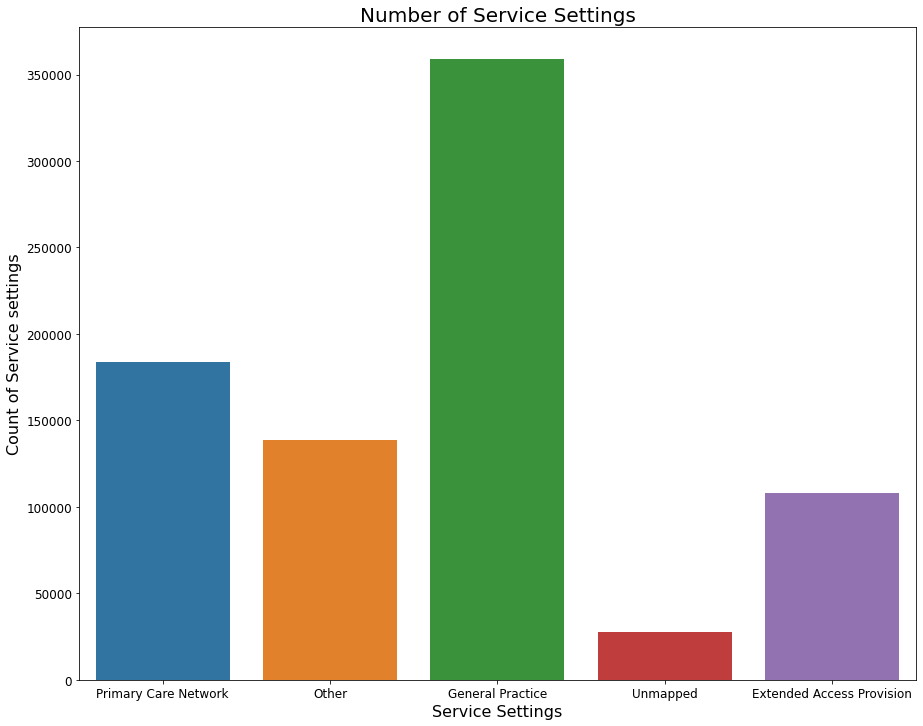

In [23]:
# Visualise the number of service settings 
# Create a seaborn countplot
# Set figure size
plt.figure(figsize=(15,12))
sns.countplot(x = nc['service_setting'])
plt.xlabel('Service Settings',fontsize = 16)
plt.ylabel('Count of Service settings', fontsize=16)
plt.title('Number of Service Settings', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

# 

**Summary :**

The high level screening of the data indicated there were 106 locations across the UK for which data was provided . The top 5 locations with the highest records were identified and NHS North West London was shortlisted to further understand the data that is provided. 
It was found that the data set contained
1)	5 service settings

2)	3 context types

3)	18 National categories

4)	3 appointment statuses

    

# Analyse the data

### Explore the data and to answer to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

*ad - actual_duration Dataframe*

In [24]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad['appointment_date'].loc[0:4])
ad.head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


The 'appointment_date' in ad DataFrame is object(string)data type

In [25]:
# Change the date format of ad['appointment_date'] to datetime format
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

# View the DateFrame.
ad.head()
print(ad.dtypes)

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [26]:
# Determine the first and last date of scheduled appointments
# Using min() and max() methods
# strftime() is used to format the date results
dates_first = ad['appointment_date'].min().strftime("%d-%B-%Y")
dates_last =  ad['appointment_date'].max().strftime("%d-%B-%Y")

# View the results
print(f"The appointments were scheduled between {dates_first} and {dates_last}")

The appointments were scheduled between 01-December-2021 and 30-June-2022


*nc - National category DataFrame*

In [27]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc['appointment_date'].loc[0:4])
nc.head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


The 'appointment_date' column in nc DataFrame is in datetime format.

In [28]:
# Determine the first and last date of scheduled appointments
dates_first = nc["appointment_date"].min().strftime("%d-%B-%Y")
dates_last =  nc["appointment_date"].max().strftime("%d-%B-%Y")

# View the results
print(f"The appointments were scheduled between {dates_first} and {dates_last}")

The appointments were scheduled between 01-August-2021 and 30-June-2022


*ar - Appointments Regional DataFrame*

In [29]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
print(ar['appointment_month'].loc[0:4])
ar.head()

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [30]:
# ar DataFrame contains only 'appointment_month' column
# Determine the first and last months of scheduled appointments
print(f"The appointments were scheduled between \
{ar['appointment_month'].min()} and {ar['appointment_month'].max()}")


The appointments were scheduled between 2020-01 and 2022-06


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [31]:
# Determine the number of records available for the period and the location. 
# Use a filter for the location filter_loc
# Use a filter for the time period - filter_date
filter_loc = nc["sub_icb_location_name"]=="NHS North West London ICB - W2U3Z"
filter_date = nc["appointment_date"].isin(pd.date_range("2022-01-01", "2022-06-01"))

# Create a subset of nc DataFrame containing only the filtered date period and location filter
nc_subset = nc.loc[filter_loc & filter_date]

# View the subset DataFrame
nc_subset

# Determine the service setting that reported the most number of appointments
# Use groupby to get the total number of appointments in each service setting
# Sort_values(ascending =False) will sort from high to low values
nc_service = nc_subset.groupby('service_setting')['count_of_appointments'].\
sum().sort_values(ascending=False)
print(nc_service)

# iloc - to retrieve the first row of the sorted series - this is the maximum 
print(f"\n\nMost number of appointments :\n{nc_service.iloc[0:1]}")

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64


Most number of appointments :
service_setting
General Practice    4804239
Name: count_of_appointments, dtype: int64


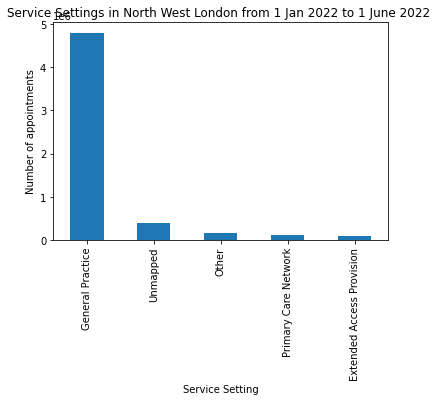

In [32]:
# View the result as a barplot
fig,ax = plt.subplots()

# nc_subset['service_setting'].value_counts().plot(kind = 'bar')
nc_service.plot(kind='bar')
ax.set_title('Service Settings in North West London from 1 Jan 2022 to 1 June 2022 ')
ax.set_xlabel('Service Setting')
ax.set_ylabel('Number of appointments')
plt.show()

The Service Setting 'GP' reported the highest number of appointments from North West London - 'NHS North West London ICB - W2U3Z' from 1 January to 1 June 2022

**Question 3:** Which month had the highest number of appointments?

In [33]:
# Number of appointments per month = sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
# dt method is used to calculate the appointments based on year and month
nc_appts = nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year,nc['appointment_date'].dt.month]).\
sum().sort_values(ascending =False)

# View the result
nc_appts

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

In [34]:
# Use iloc [] to retrieve the first row which gives the month,year with the highest number of appointments
# Highest number of appointments
nc_appts.iloc[0:1]


appointment_date  appointment_date
2021              11                  30405070
Name: count_of_appointments, dtype: int64

November 2021 had the highest number of appointments

**Question 4:** What was the total number of records per month?

In [35]:
# Total number of records per month.
nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).\
agg({'count_of_appointments':'count'})

count_of_appointments
appointment_date appointment_date                       
2021             8                                 69999
                 9                                 74922
                 10                                74078
                 11                                77652
                 12                                72651
2022             1                                 71896
                 2                                 71769
                 3                                 82822
                 4                                 70012
                 5                                 77425
                 6                                 74168

In [36]:
# Sort the total number of records
nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).\
agg({'count_of_appointments':'count'}).sort_values(by='count_of_appointments', ascending=False)

count_of_appointments
appointment_date appointment_date                       
2022             3                                 82822
2021             11                                77652
2022             5                                 77425
2021             9                                 74922
2022             6                                 74168
2021             10                                74078
                 12                                72651
2022             1                                 71896
                 2                                 71769
                 4                                 70012
2021             8                                 69999

Summary : 
On analysing the datasets the following were discovered.
1. The date ranges vary across the datasets.
- ad - 01 Dec 2021 to 30 June 2022
- nc - 01 Aug 2021 to 30 June 2022
- ar - Jan 2020 to June 2022.

For this analysis, appointments from Aug 2021 are only looked into. 

2.  NHS North West London from 1 January to 1 June 2022 is is subsetted - 
    - Service Setting - General Practice is the most popular with the highest number of appointments
    
- Groupby()  and aggregate methods used to calculate the 
 - 3. Month with highest number of appointments - November 2021

 - 4. Total number of records per month 
 



# Identify and Visualise initial trends

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [37]:
# # Import the necessary libraries.
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [38]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [39]:
# Aggregate on monthly level and service settings and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].\
sum().reset_index()

# View output.
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


In [40]:
nc_ss.sort_values(by='count_of_appointments',ascending=False)

,appointment_month,service_setting,count_of_appointments
16,2021-11,General Practice,27767889
11,2021-10,General Practice,27606171
36,2022-03,General Practice,27187368
6,2021-09,General Practice,25940821
46,2022-05,General Practice,25238620
51,2022-06,General Practice,23680374
26,2022-01,General Practice,23583053
31,2022-02,General Practice,23305934
21,2021-12,General Practice,23008818
41,2022-04,General Practice,21916791


**Service settings:**

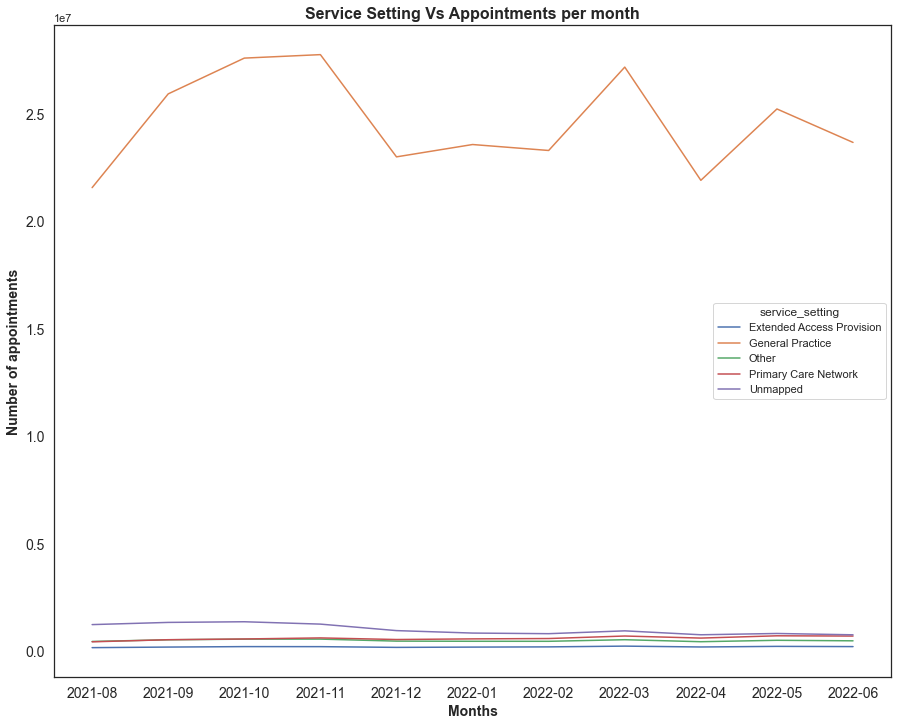

In [41]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.set_style('white')
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='service_setting',\
                  data=nc_ss)

#Add titles and labels for the lineplot
ax.set_title("Service Setting Vs Appointments per month", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)



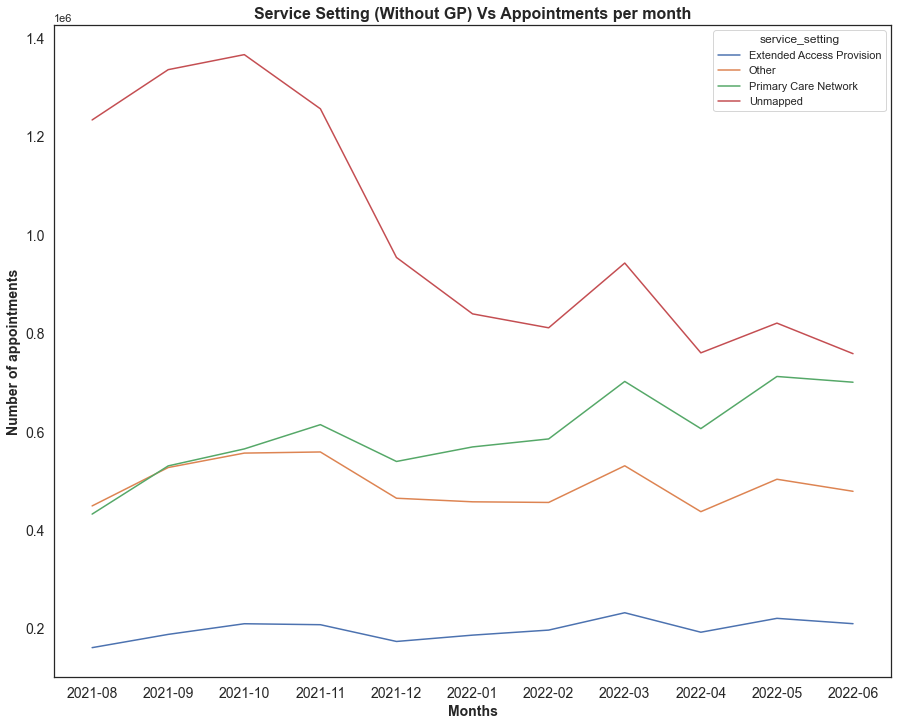

In [42]:
# Removing the 'General Practice' service setting
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='service_setting',\
                  data=nc_ss[~nc_ss['service_setting'].str.contains('General Practice')])

# Add titles and labels for the lineplot
ax.set_title("Service Setting (Without GP) Vs Appointments per month", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

Summary 
- November 2021 has the highest number of appointments - This is probably due to the onset of Winter and the winter flu. 
- December has one of the fewer number of appointments –. This may  be as it is holiday period. This period needs to be analysed further to see if there have been a lot of missed appointments and or if there has been staff shortage
- It then increases and peaks in March before going down again in April
- General Practice has the highest number of appointments 
- General Practice  was removed from the plot to eliminate  data skewness.
- Unmapped service categoryis high - potential area for improvement going forward. 


**Context types:**

In [43]:
# Create a separate dataframe for nc-context type.
#Aggregate on monthly level and context type and determine the sum of records per month.

nc_ct = nc.loc[:,['appointment_month','context_type','count_of_appointments']].\
groupby(['appointment_month','context_type']).sum().reset_index()

# View output.
nc_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


In [44]:
#Sorting
nc_ct.sort_values(by='count_of_appointments', ascending=False)

,appointment_month,context_type,count_of_appointments
9,2021-11,Care Related Encounter,26282778
6,2021-10,Care Related Encounter,26125201
21,2022-03,Care Related Encounter,25928850
3,2021-09,Care Related Encounter,24404251
27,2022-05,Care Related Encounter,24101243
30,2022-06,Care Related Encounter,22621827
15,2022-01,Care Related Encounter,22441947
18,2022-02,Care Related Encounter,22211021
12,2021-12,Care Related Encounter,21798612
24,2022-04,Care Related Encounter,20904193


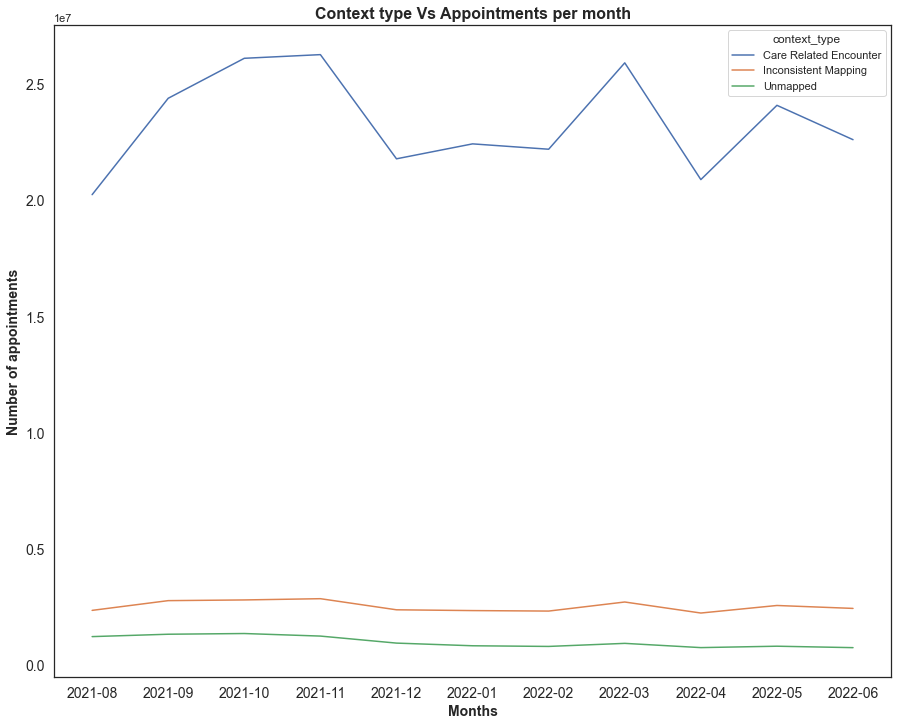

In [45]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='context_type',data=nc_ct)

#Add titles and labels for the lineplot
ax.set_title("Context type Vs Appointments per month", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

Summary :
- Care related encounter type is the highest.
 - It follows a similar trend as that of the number of appointments in the GP service setting 
	



**National categories:**

In [46]:
# Create a separate dataframe for nc-national_category column.
# Aggregate on monthly level and national category and determine the sum of records per month. 
nc_nc = nc.loc[:,['appointment_month','national_category','count_of_appointments']]\
.groupby(['appointment_month','national_category']).sum().reset_index()

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


In [47]:
# Sorting the appointments from high to low
nc_nc.sort_values(by='count_of_appointments',ascending=False)

,appointment_month,national_category,count_of_appointments
130,2022-03,General Consultation Routine,10074249
58,2021-11,General Consultation Routine,9778682
166,2022-05,General Consultation Routine,9320538
40,2021-10,General Consultation Routine,9256788
22,2021-09,General Consultation Routine,9060243
...,...,...,...
113,2022-02,Group Consultation and Group Education,5397
5,2021-08,Group Consultation and Group Education,5161
95,2022-01,Group Consultation and Group Education,5108
149,2022-04,Group Consultation and Group Education,4921


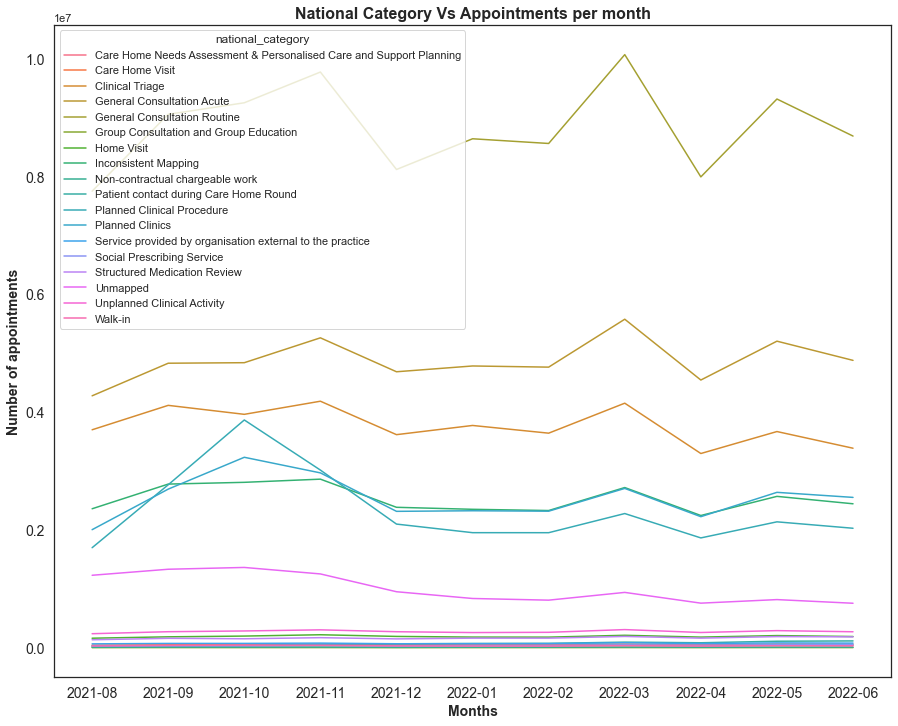

In [48]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',\
                  hue='national_category',data=nc_nc)

#Add titles and labels for the lineplot
ax.set_title("National Category Vs Appointments per month", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

Summary:
 - General Consultation Routine has the maximum no of appts
 - Followed by General Consultation Acute category
 - Planned Clinic appointments spike in October – This is also the month with the maximum number of appointments. 

### Objective 2
The number of appointments for service settings is explored to see seasonal trends.. 
 - Summer- August 2021
 - Autumn – October 2021
 - Winter – January 2022
 - Spring – April 2022



**Summer (August 2021):**

In [49]:
# Look at August 2021 in more detail.
# nc_ss_aug = nc.loc[nc['appointment_month'] == '2021-08']

# Create a new DataFrame for August 2021
nc_ss_summer = nc.loc[nc['appointment_month']=='2021-08'].\
groupby(['appointment_date','service_setting'])\
['count_of_appointments'].sum().reset_index()

# View the result
nc_ss_summer

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
150,2021-08-31,Extended Access Provision,8281
151,2021-08-31,General Practice,1125584
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789


In [50]:
nc_ss_summer.sort_values(by='count_of_appointments',ascending=False)

,appointment_date,service_setting,count_of_appointments
151,2021-08-31,General Practice,1125584
111,2021-08-23,General Practice,1120798
76,2021-08-16,General Practice,1119367
41,2021-08-09,General Practice,1110226
6,2021-08-02,General Practice,1108073
...,...,...,...
3,2021-08-01,Primary Care Network,323
108,2021-08-22,Primary Care Network,314
145,2021-08-30,Extended Access Provision,305
38,2021-08-08,Primary Care Network,289


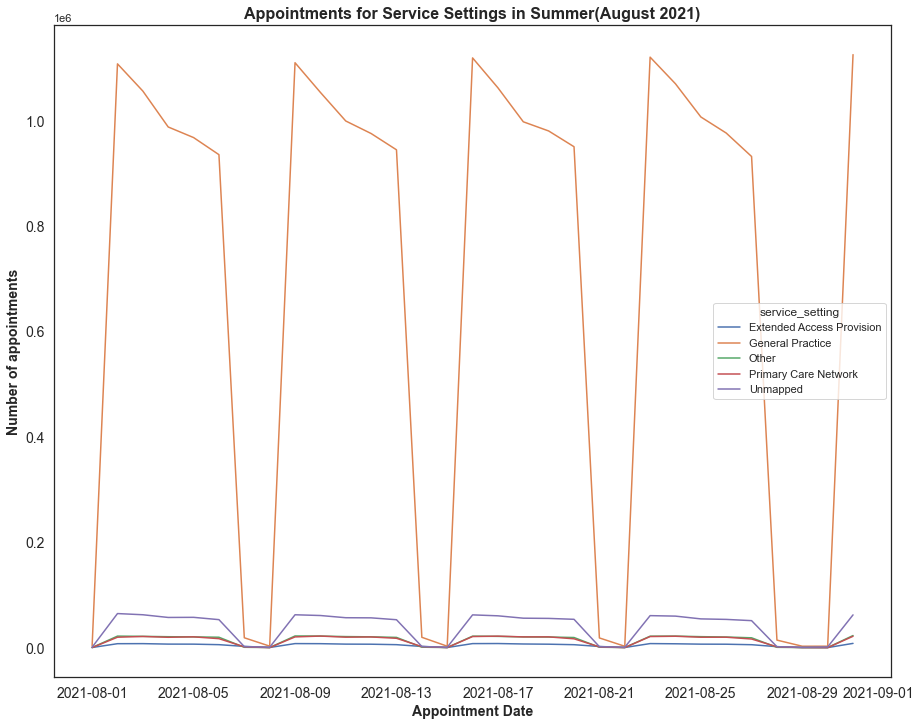

In [51]:
# Create a lineplot.
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')
ax= sns.lineplot(x='appointment_date', y='count_of_appointments',\
                 hue='service_setting',data=nc_ss_summer)

#Add titles and labels for the lineplot
ax.set_title("Appointments for Service Settings in Summer(August 2021)",\
             fontsize=16,fontweight='bold')
ax.set_xlabel('Appointment Date', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

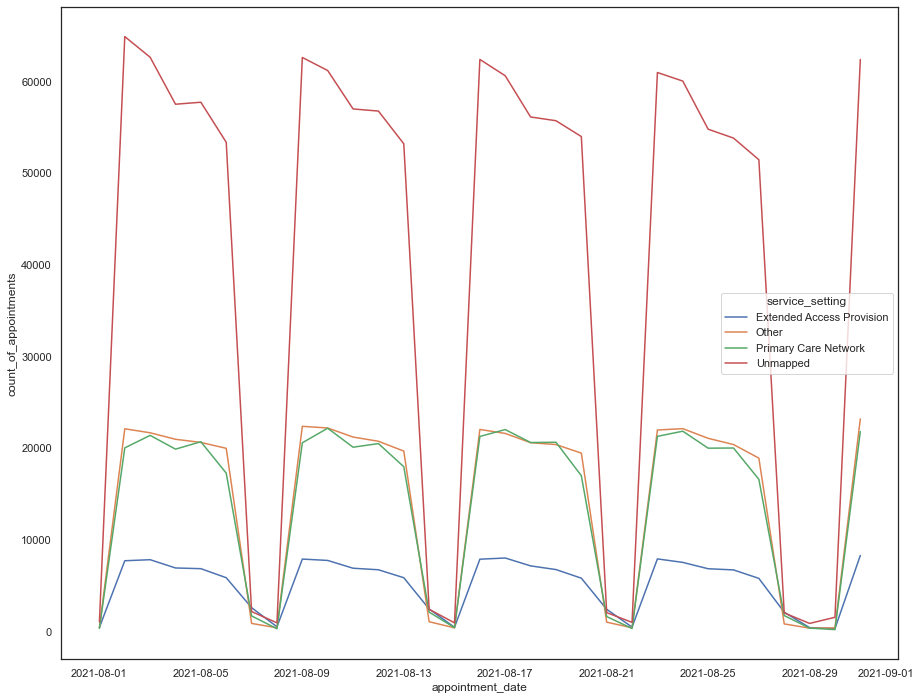

In [52]:
ax= sns.lineplot(x='appointment_date', y='count_of_appointments',\
                 hue='service_setting',data=nc_ss_summer[~nc_ss_summer['service_setting'].str.contains('General Practice')])

**Autumn (October 2021):**

In [53]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_oct = nc.loc[nc['appointment_month'] == '2021-10']

# nc_ss_oct = nc.loc[:,['appointment_date','service_setting','count_of_appointments']]\
# [nc['appointment_month']=='2021-10']

# Create a new DataFrame for Autumn(Oct 2021) 
nc_ss_autumn = nc_ss_oct.groupby(['appointment_date','service_setting'])\
['count_of_appointments'].sum().reset_index()

# View the output
nc_ss_autumn

,appointment_date,service_setting,count_of_appointments
0,2021-10-01,Extended Access Provision,7107
1,2021-10-01,General Practice,1130646
2,2021-10-01,Other,22639
3,2021-10-01,Primary Care Network,22974
4,2021-10-01,Unmapped,56201
...,...,...,...
150,2021-10-31,Extended Access Provision,1113
151,2021-10-31,General Practice,17449
152,2021-10-31,Other,1147
153,2021-10-31,Primary Care Network,1200


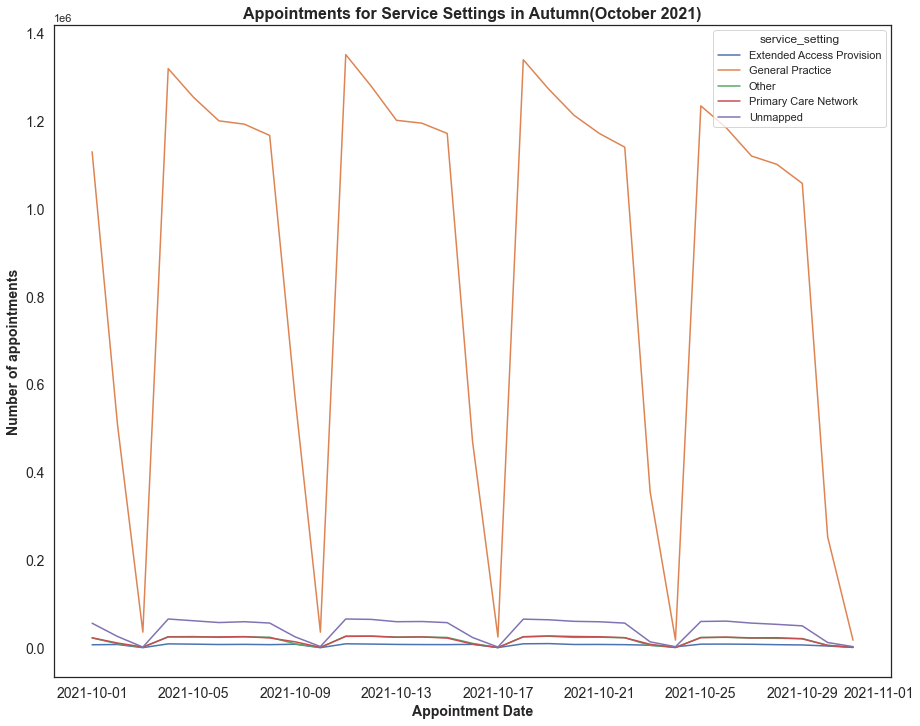

In [54]:
# Create a lineplot for Autumn(October 2021)
ax= sns.lineplot(x='appointment_date', y='count_of_appointments',\
                 hue='service_setting',data=nc_ss_autumn)

#Add titles and labels for the lineplot
ax.set_title("Appointments for Service Settings in Autumn(October 2021)",\
             fontsize=16,fontweight='bold')
ax.set_xlabel('Appointment Date', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

**Winter (January 2022):**

In [55]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_jan = nc.loc[nc['appointment_month'] == '2022-01']
# nc_ss_jan = nc.loc[:,['appointment_date','service_setting','count_of_appointments']]\
# [nc['appointment_month']=='2022-01']

# Create anew DataFrame for Winter(Jan 2022)
nc_ss_winter = nc_ss_jan.groupby(['appointment_date','service_setting'])\
['count_of_appointments'].sum().reset_index()

# View the output
nc_ss_winter


,appointment_date,service_setting,count_of_appointments
0,2022-01-01,Extended Access Provision,246
1,2022-01-01,General Practice,3578
2,2022-01-01,Other,280
3,2022-01-01,Primary Care Network,215
4,2022-01-01,Unmapped,572
...,...,...,...
150,2022-01-31,Extended Access Provision,9962
151,2022-01-31,General Practice,1305082
152,2022-01-31,Other,25034
153,2022-01-31,Primary Care Network,30509


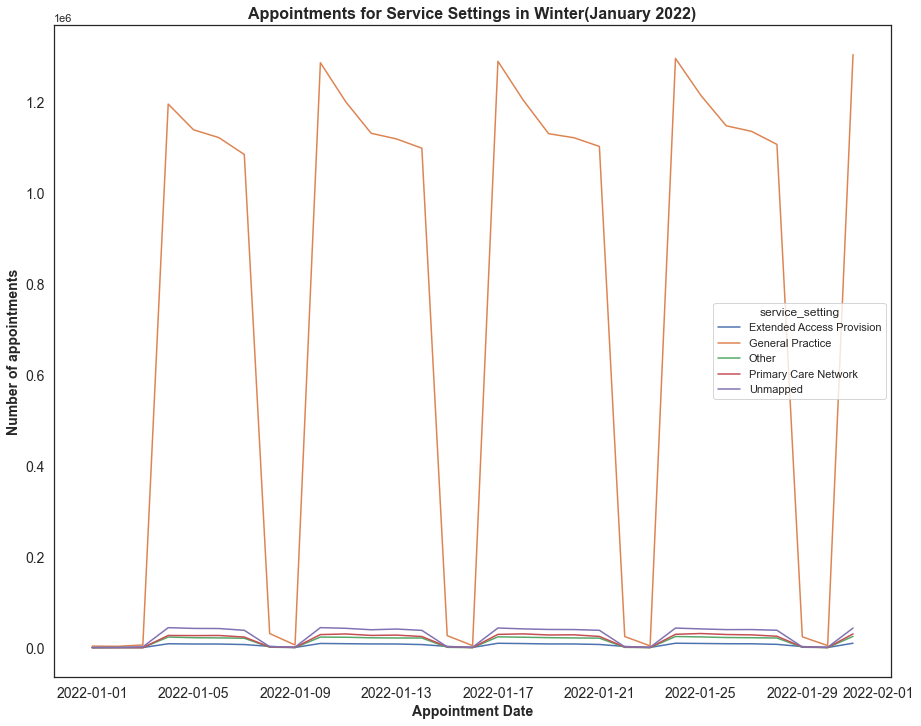

In [56]:
# Create a lineplot for Winter(January 2022)
ax= sns.lineplot(x='appointment_date', y='count_of_appointments',\
                 hue='service_setting',data=nc_ss_winter)

#Add titles and labels for the lineplot
ax.set_title("Appointments for Service Settings in Winter(January 2022)",\
             fontsize=16,fontweight='bold')
ax.set_xlabel('Appointment Date', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

**Spring (April 2022):**

In [57]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_april = nc.loc[nc['appointment_month'] == '2022-04']

# nc_ss_april = nc.loc[:,['appointment_date','service_setting','count_of_appointments']]\
# [nc['appointment_month']=='2022-04']

# Create a new DataFrame fro Spring(April 2022)
nc_ss_spring = nc_ss_april.groupby(['appointment_date','service_setting'])\
['count_of_appointments'].sum().reset_index()

# View the output
nc_ss_spring


,appointment_date,service_setting,count_of_appointments
0,2022-04-01,Extended Access Provision,8011
1,2022-04-01,General Practice,1085037
2,2022-04-01,Other,21077
3,2022-04-01,Primary Care Network,26493
4,2022-04-01,Unmapped,36836
...,...,...,...
145,2022-04-30,Extended Access Provision,3416
146,2022-04-30,General Practice,23675
147,2022-04-30,Other,1148
148,2022-04-30,Primary Care Network,3150


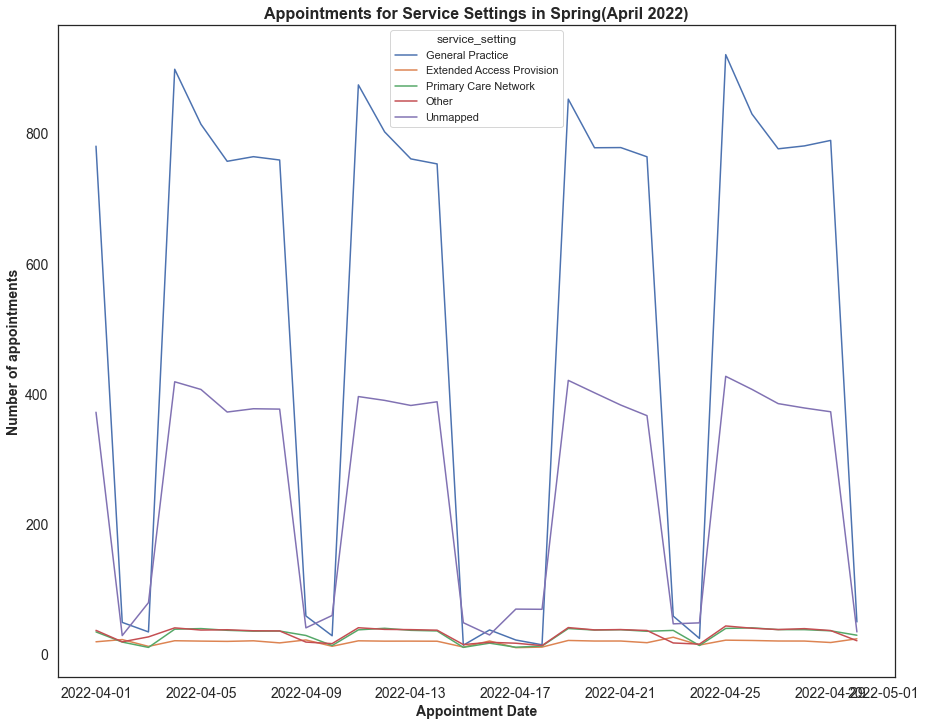

In [58]:
# Create a lineplot for Spring(April 2022)
ax= sns.lineplot(x='appointment_date', y='count_of_appointments',\
                 hue='service_setting',data=nc_ss_april, ci=None)

#Add titles and labels for the lineplot
ax.set_title("Appointments for Service Settings in Spring(April 2022)",\
             fontsize=16,fontweight='bold')
ax.set_xlabel('Appointment Date', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

Summary:
 - General Practice has the highest number of appointments.
 - The fluctuations in the number of appointments across all the service settings
      - peaking on a Monday and then reducing to zero for the weekends
 - Similar trend observed across all seasons.
 - Spring has significantly lower number of appointments.

# Twitter Analysis and Trends

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [59]:
# Libraries and settings needed for analysis
# import pandas as pd
# import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [60]:
# Load the data set
tweets = pd.read_csv('tweets.csv')

# Sense-check and View the DataFrame
print(tweets.shape)
print(tweets.columns)
print(tweets.dtypes)
tweets.head()

(1174, 10)
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [61]:
# Explore the metadata
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [62]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [63]:
# Would it be useful to only look at retweeted and favourite tweet messages?
tweets['tweet_retweet_count'].value_counts().sort_values(ascending=False)
# print(tweets['tweet_retweet_count'].value_counts())

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
208     12
6       12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
62       3
68       3
207      3
41       3
85       3
76       3
78       2
23       2
24       2
72       2
16       2
20       1
54       1
40       1
57       1
303      1
19       1
39       1
107      1
79       1
14       1
15       1
48       1
49       1
13       1
169      1
Name: tweet_retweet_count, dtype: int64

In [64]:
tweets['tweet_retweet_count'].max()


303

In [65]:
# View the tweets with retweet count > 100
tweets[tweets['tweet_retweet_count'] > 100]

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
27,1567581274088566785,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
86,1567578852159004675,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
126,1567577096314322944,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",207,0,False,False,en
263,1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': ""Ultima Lions' Den"", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",303,0,False,False,en
330,1567644141726703617,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
595,1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
779,1567609685074759686,RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…,"{'hashtags': [{'text': 'Applications', 'indices': [21, 34]}, {'text': 'AI', 'indices': [38, 41]}, {'text': 'healthcare', 'indices': [45, 56]}, {'text': 'digitalhealth', 'indices': [76, 90]}, {'tex...","#Applications, #AI, #healthcare, #digitalhealth, #Healthtech, #Health, #DataScience, #Bigdata","{'iso_language_code': 'en', 'result_type': 'recent'}",150,0,False,False,en
781,1567609653814493187,RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…,"{'hashtags': [{'text': 'Applications', 'indices': [21, 34]}, {'text': 'AI', 'indices': [38, 41]}, {'text': 'healthcare', 'indices': [45, 56]}, {'text': 'digitalhealth', 'indices': [76, 90]}, {'tex...","#Applications, #AI, #healthcare, #digitalhealth, #Healthtech, #Health, #DataScience, #Bigdata","{'iso_language_code': 'en', 'result_type': 'recent'}",150,0,False,False,en
790,1567609182001545221,RT @Khulood_Almani: #Healthcare

In [66]:
# Favorite_count
tweets['tweet_favorite_count'].value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

In [67]:
# View the tweets with favorite count > 100
tweets[tweets['tweet_favorite_count']>20]

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en


‘tweet_retweet_count’ and ‘tweet_favorite_count’ columns are explored to check the tweets that have the most number of retweets and favorite tweets.
 

### Review the hashtags(#)

In [68]:
# Create a new DataFrame containing only the 'tweet_full_text' column.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
print(type(tweets_text))
tweets_text.head()


<class 'pandas.core.frame.DataFrame'>


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [69]:
# Loop through the messages, and create a list of values containing the # symbol.

# Create an empty list
tags = []
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
print(len(tags))
tags

4333


['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [70]:
# Display the first 30 records.
# Convert the tags list to Pandas Series
# Create Pandas Series to count the values in the list
hashtags = pd.Series(tags).value_counts()

# View the first 30 records
hashtags.iloc[:30]

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

### Identify the top trending hashtags with a visualisation

In [71]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(hashtags).reset_index()

# View the DataFrame
data.head(30)

# Rename the columns.
data.rename(columns = {data.columns[0]:'word', data.columns[1]:'count'}, inplace=True)

data.head(30)

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [72]:
# Fix the count datatype.
# Check data types of the new dataframe and ensure 'count' is integer type
data.dtypes

word     object
count     int64
dtype: object

In [73]:
# Display records where the count is larger than 10.
data_new= data[data['count'] > 10]
data_new

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


<AxesSubplot:xlabel='word', ylabel='count'>

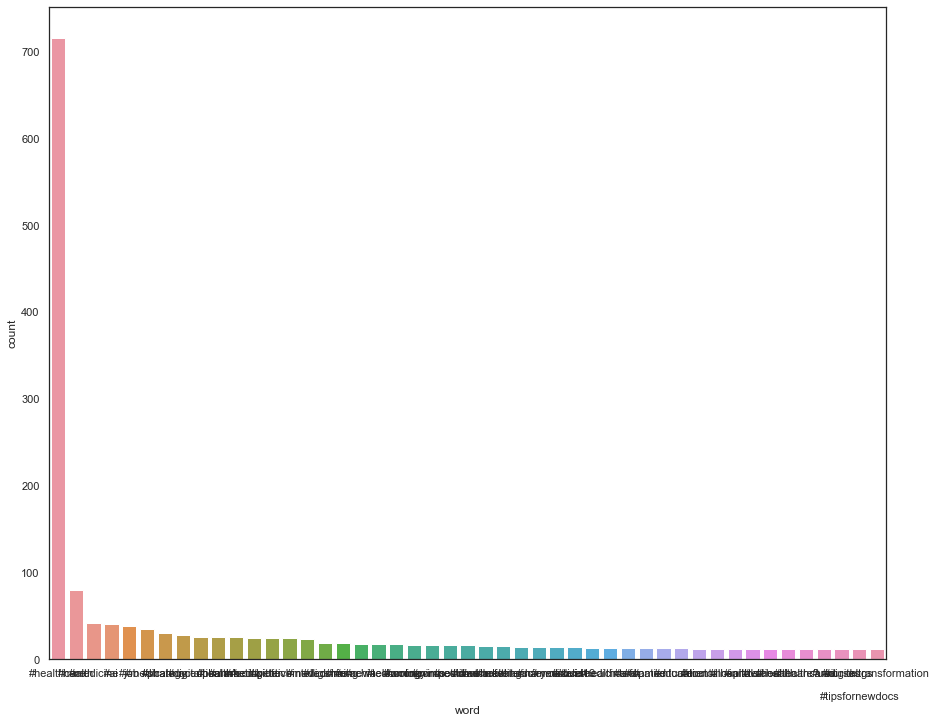

In [74]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(x='word' , y='count', data=data_new)

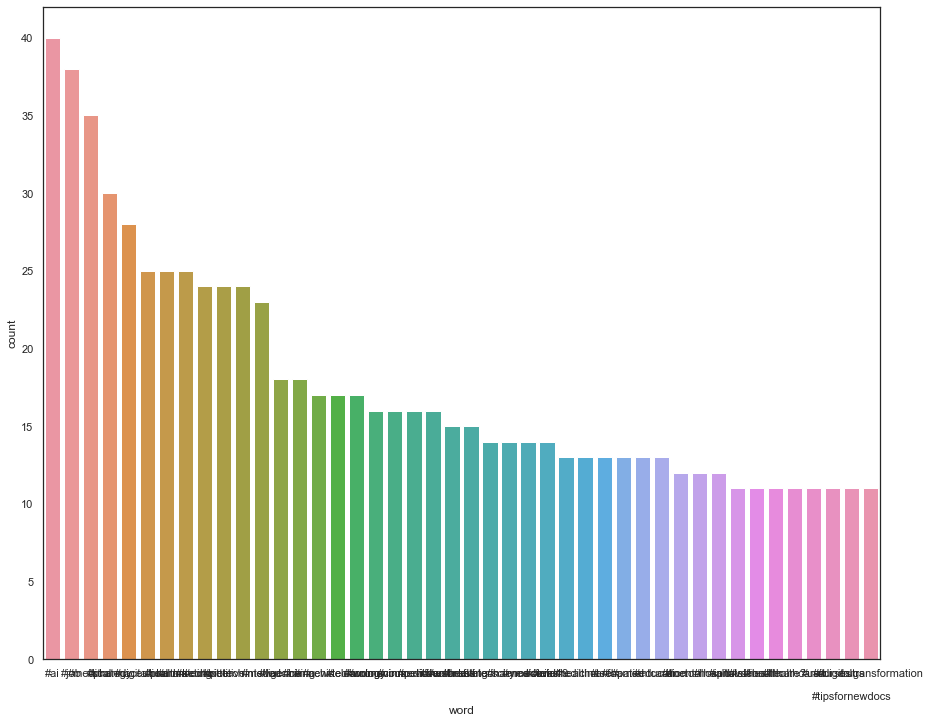

In [75]:
# Remove outliers - to eliminate the overrepresented hashtags.
# The columns you want to search for outliers in.
cols = ['count']

# Calculate quantiles and IQR.
Q1 = data_new[cols].quantile(0.25)
Q3 = data_new[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((data_new[cols] < (Q1 - 1.5 * IQR)) | (data_new[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Filter our DataFrame based on condition.
data_non_outlier = data_new[condition]
data_non_outlier
ax = sns.barplot(x='word', y='count', data=data_non_outlier)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '#ai'),
  Text(1, 0, '#job'),
  Text(2, 0, '#medical'),
  Text(3, 0, '#strategy'),
  Text(4, 0, '#pharmaceutical'),
  Text(5, 0, '#digitalhealth'),
  Text(6, 0, '#pharma'),
  Text(7, 0, '#marketing'),
  Text(8, 0, '#medtwitter'),
  Text(9, 0, '#biotech'),
  Text(10, 0, '#competitiveintelligence'),
  Text(11, 0, '#meded')])

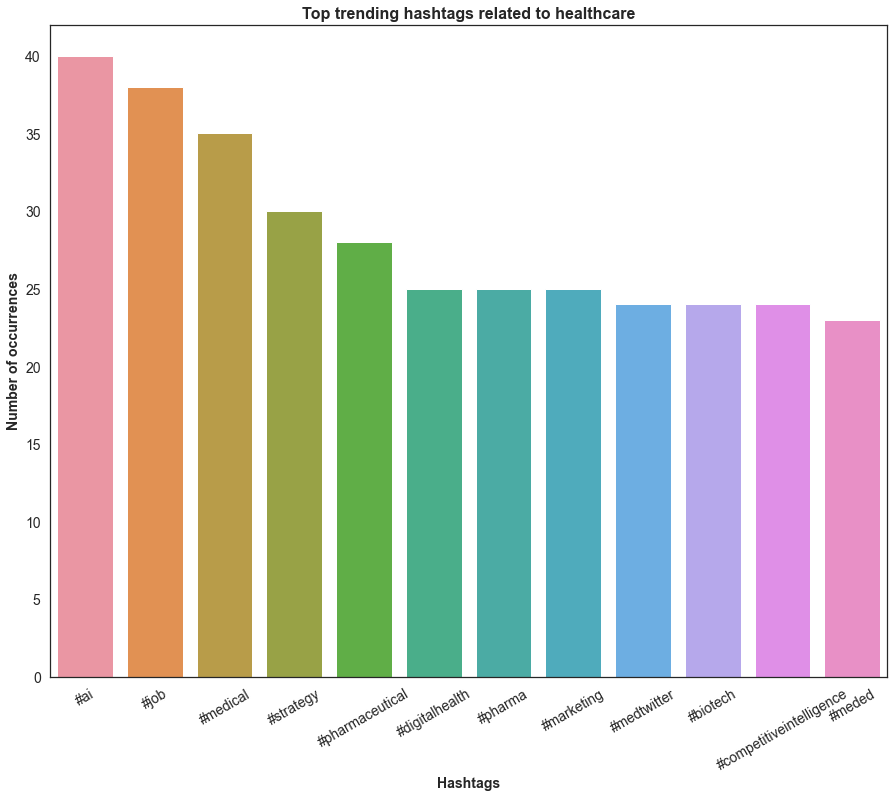

In [76]:
# Improve the visualization
# Displaying the frequently used '#' - count > 20

ax = sns.barplot(x='word', y='count', data=data_non_outlier[data_non_outlier['count']>20])
#Add titles and labels for the barplot
ax.set_title("Top trending hashtags related to healthcare",\
             fontsize=16,fontweight='bold')
ax.set_xlabel('Hashtags', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of occurrences', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation =30)
# View the barplot

In [77]:
len(data_non_outlier)

44

# 

# Recommendations

### Investigate the main concerns posed by the NHS. 

In [78]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
# ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)
ar.head()


(596821, 7)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [79]:
# Print the minimum and maximum dates pertaining to the ar data set.
print(f"The earliest month of appointment is {ar['appointment_month'].min()}")
print(f"The latest month of appointment is {ar['appointment_month'].max()}")

The earliest month of appointment is 2020-01
The latest month of appointment is 2022-06


In [80]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_new = ar[ar['appointment_month'] >= '2021-08']
ar_new

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [81]:
# Create an aggregated data set to review the different features.
ar_agg = ar_new[['appointment_month','appointment_status','hcp_type',\
                          'appointment_mode', 'time_between_book_and_appointment',\
                          'count_of_appointments']].groupby('appointment_month').sum().reset_index()

# View the DataFrame.
ar_agg


,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [82]:
# Create a new DataFrame
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].agg('sum').reset_index()

# View the Dataframe
ar_df

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


In [83]:
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['avg_utilisation'] = ar_df['count_of_appointments'] / 30

# Round the value to one decimal place.
ar_df['avg_utilisation'] = ar_df['avg_utilisation'].round(1)

# NHS can accomodate a maximum of 1,200,000 appointments per day
nhs_max = 1200000

# Add another column for Utilisation_percent
ar_df['Utilisation_percent'] = (ar_df['avg_utilisation']/nhs_max *100).round(2)

# view the DataFrame
ar_df.sort_values(by='count_of_appointments',ascending=False)


,appointment_month,count_of_appointments,avg_utilisation,Utilisation_percent
3,2021-11,30405070,1013502.3,84.46
2,2021-10,30303834,1010127.8,84.18
7,2022-03,29595038,986501.3,82.21
1,2021-09,28522501,950750.0,79.23
9,2022-05,27495508,916516.9,76.38
10,2022-06,25828078,860935.9,71.74
5,2022-01,25635474,854515.8,71.21
6,2022-02,25355260,845175.3,70.43
4,2021-12,25140776,838025.9,69.84
8,2022-04,23913060,797102.0,66.43


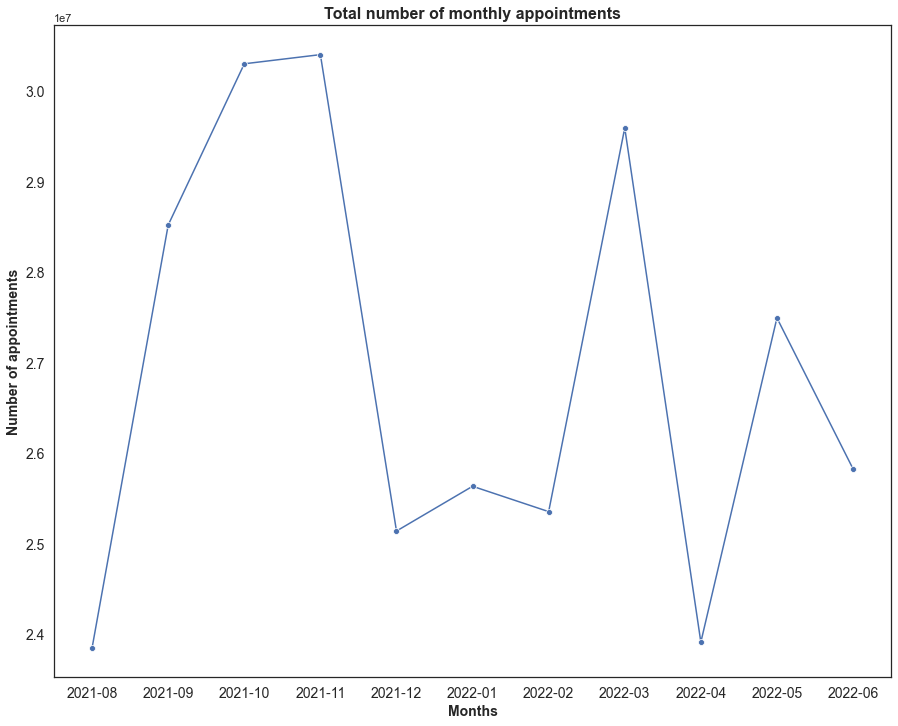

In [84]:
# Convert the appointment_month to string data type for ease of visualisation.
# ar_df['appointment_month'] is str datatype

# Create a lineplot with Seaborn indicating the sum of monthly visits
ax =sns.lineplot(x='appointment_month', y='count_of_appointments',marker ='o',data=ar_df)

#Add titles and labels for the lineplot
ax.set_title("Total number of monthly appointments", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)


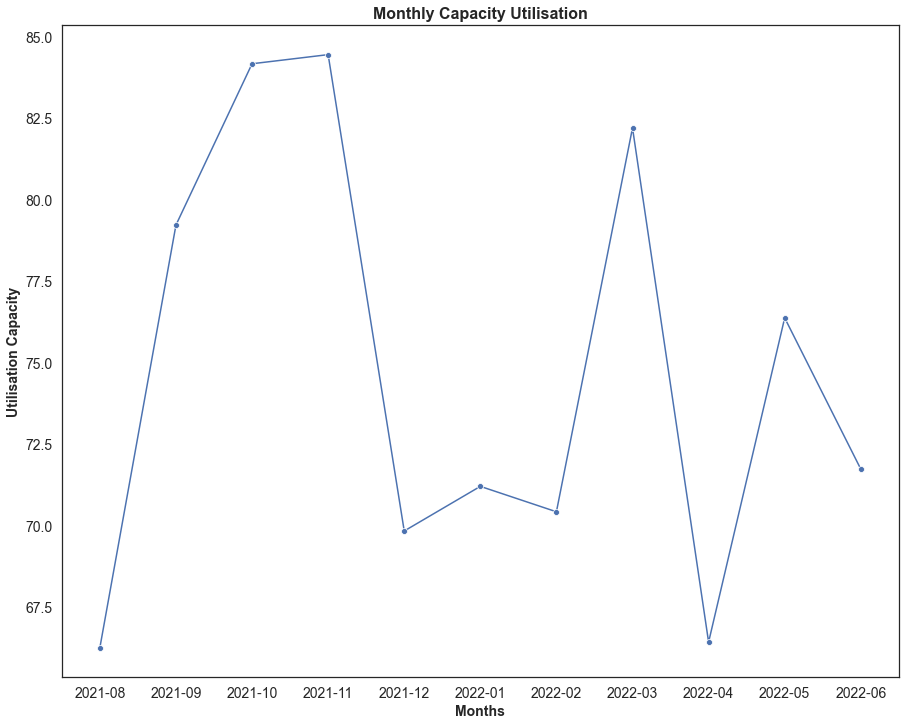

In [85]:
# Create a seaborn lineplot indicating the monthly capacity utilisation.

ax = sns.lineplot(x='appointment_month', y='Utilisation_percent',marker ='o',data=ar_df)

#Add titles and labels for the lineplot
ax.set_title("Monthly Capacity Utilisation", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Utilisation Capacity', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)



 - To inform if the NHS should start  looking at increasing staff levels the NHS utilization was evaluated

This was done by grouping the total number of appointments for each month and compared with the maximum NHS capacity of  hundred and twenty thousand (120,000) appointments per day.
 - Maximum utilization percentage was approximately 85 % in the month of November 2021 


**Question 2:** How do the healthcare professional types differ over time?

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-08,Unknown,755328
3,2021-09,GP,14487785
4,2021-09,Other Practice staff,13126731
5,2021-09,Unknown,907985
6,2021-10,GP,14300751
7,2021-10,Other Practice staff,14942504
8,2021-10,Unknown,1060579
9,2021-11,GP,14897749


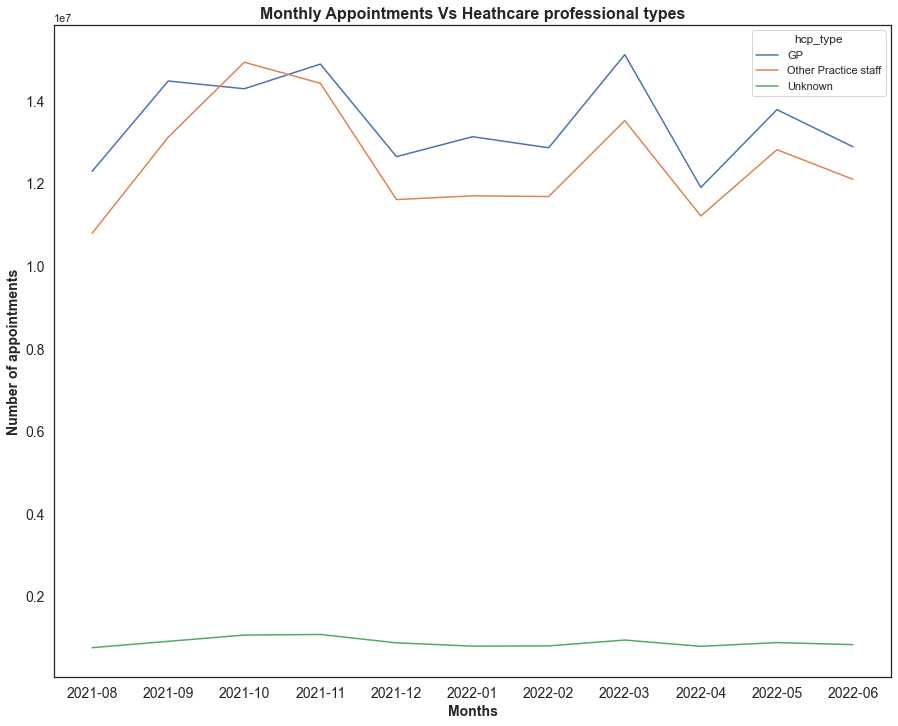

In [86]:
# Create a DataFrame for the monthly appointments in hcp_type
ar_hcp = ar_new.groupby(['appointment_month','hcp_type'])\
['count_of_appointments'].sum().reset_index()

# Create a plot to show the different hcp_type appointments across the months
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='hcp_type',\
             data=ar_hcp,ci=None)

# Add titles and labels for the lineplot
ax.set_title("Monthly Appointments Vs Heathcare professional types", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

# View the DataFrame
ar_hcp



 - The ‘Other Practise Staff’ category have a greater number of appointments in October- November , the busiest months. 
 - Both GP and Other Practise Staff are well utilised.


**Question 3:** Are there significant changes in whether or not visits are attended?

,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,22081765
1,2021-08,DNA,949137
2,2021-08,Unknown,821269
3,2021-09,Attended,25757066
4,2021-09,DNA,1321348
5,2021-09,Unknown,1444087
6,2021-10,Attended,27170506
7,2021-10,DNA,1565624
8,2021-10,Unknown,1567704
9,2021-11,Attended,27667665


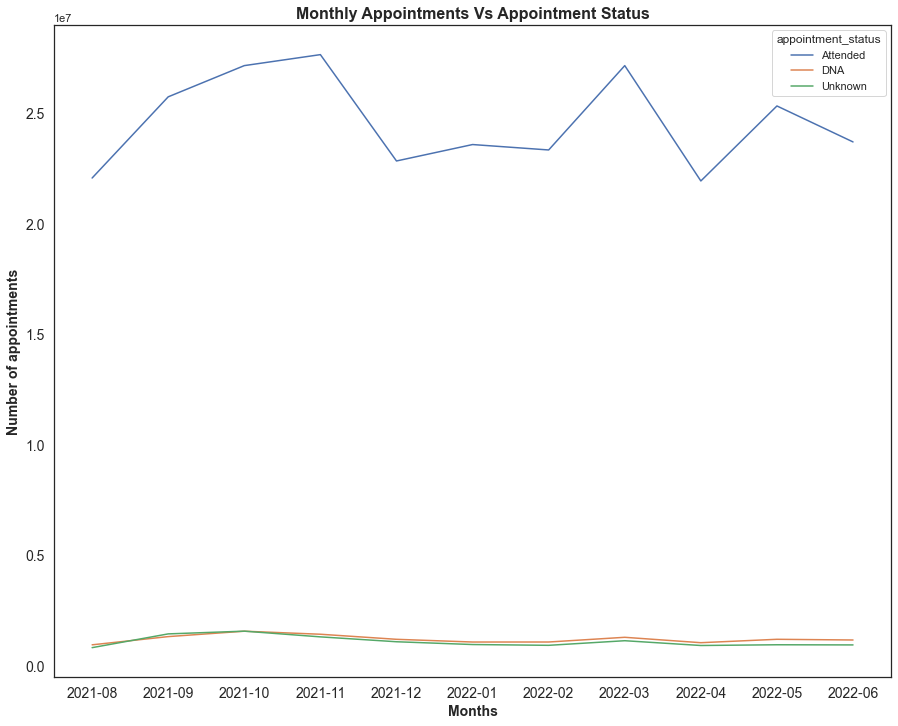

In [87]:
# Create a DataFrame for the  appointment statuses and  monthly number of appointments
ar_status = ar_new.groupby(['appointment_month','appointment_status'])\
['count_of_appointments'].sum().reset_index()

# Create a plot to show the changes in appointment statuses and appointments
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='appointment_status',\
             data=ar_status,ci=None)
# Add titles and labels for the lineplot
ax.set_title("Monthly Appointments Vs Appointment Status", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

# View the DataFrame
ar_status

In [88]:
# View the total number of appointments with DNA - Did Not Attend status
[ar_status[ar_status['appointment_status']=='DNA'].\
 sort_values(by='count_of_appointments',ascending=False)]

[   appointment_month appointment_status  count_of_appointments
 7            2021-10                DNA                1565624
 10           2021-11                DNA                1428087
 4            2021-09                DNA                1321348
 22           2022-03                DNA                1289888
 28           2022-05                DNA                1199518
 13           2021-12                DNA                1198866
 31           2022-06                DNA                1167790
 19           2022-02                DNA                1076658
 16           2022-01                DNA                1076013
 25           2022-04                DNA                1045455
 1            2021-08                DNA                 949137]

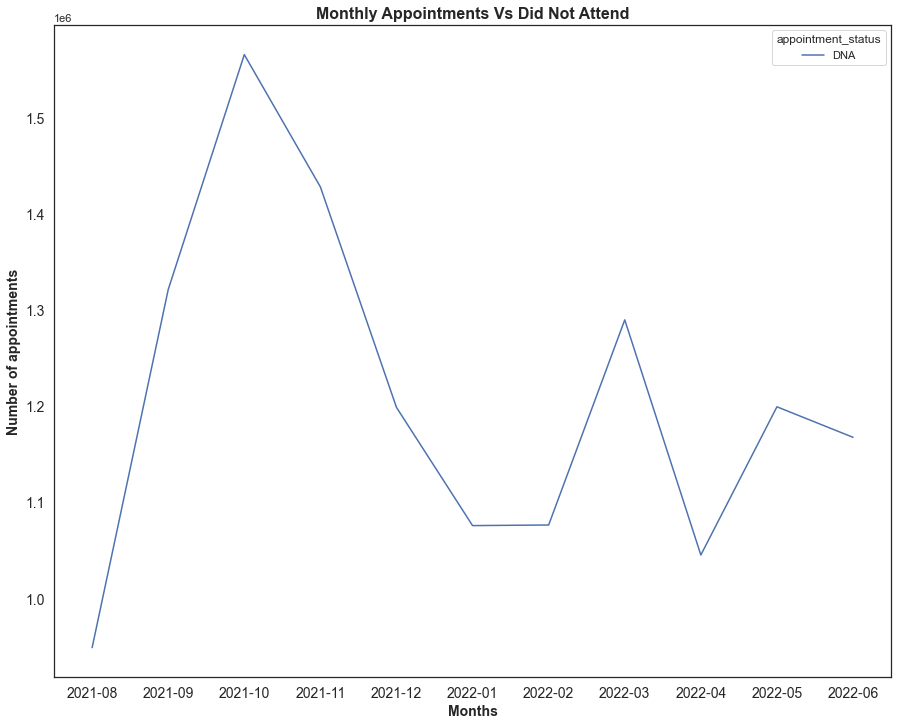

In [89]:
# Viewing only 'DNA' status Appointments
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='appointment_status',\
             data=ar_status[ar_status['appointment_status'].str.contains('DNA')],ci=None)

# Add titles and labels for the lineplot
ax.set_title("Monthly Appointments Vs Did Not Attend", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)

 - DNA - Did not Attend appointments follows the total number of appointment  n that month – with the highest number of DNA in October and a lower second  peak in March 
 - The Attended appointments follow a similar trend across the months as with hcp_typ and service settings.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

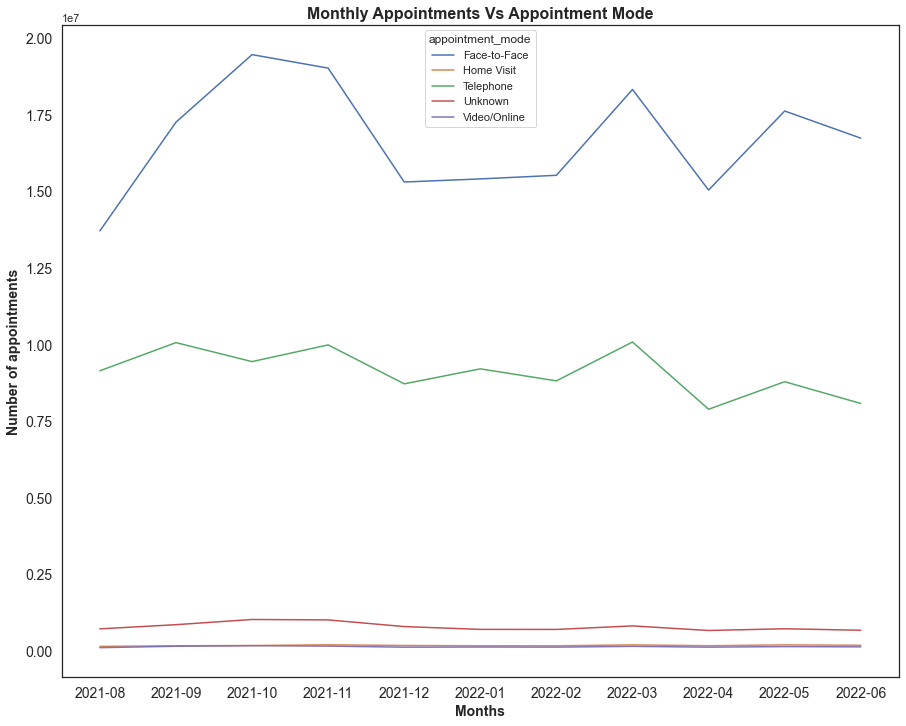

In [90]:
# Create a DataFrame for the  appointment mode and  monthly number of appointments
ar_mode = ar_new.groupby(['appointment_month','appointment_mode'])\
['count_of_appointments'].sum().reset_index()

# Create a lineplot 
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='appointment_mode',\
             data=ar_mode,ci=None)
# Add titles and labels for the lineplot
ax.set_title("Monthly Appointments Vs Appointment Mode", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)


 - The face-to-face appointments are the highest following a similar rise in Oct-Nov and desrease in Dec-Jan months. They peak again in March 2022.
 - Followed by telephonic appointments


**Question 5:** Are there any trends in time between booking an appointment?

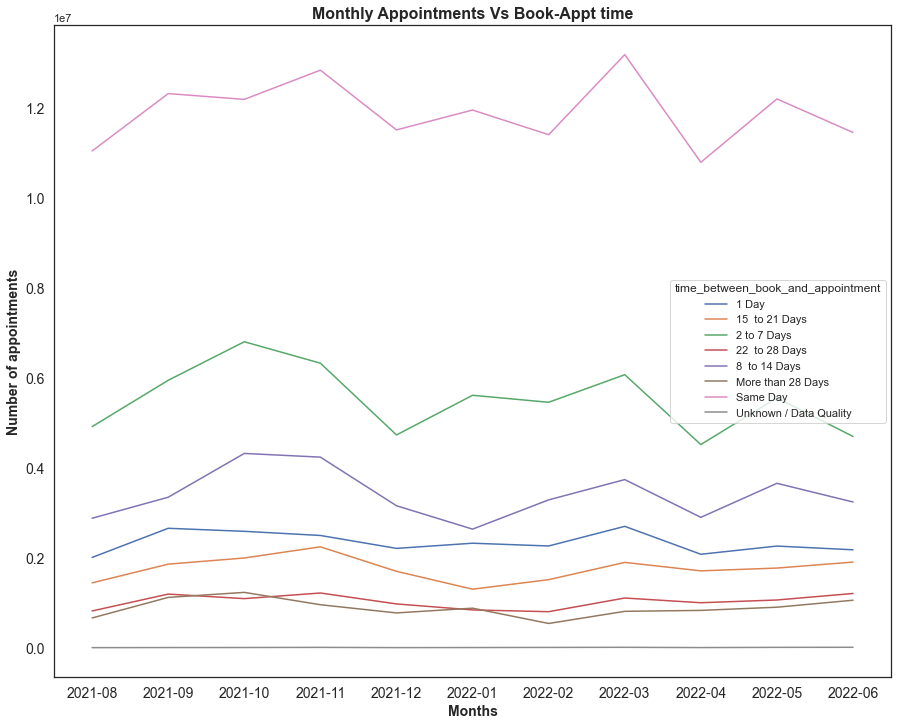

In [91]:
# Create a DataFrame for the book-appointment-time and  monthly number of appointments
ar_booktime = ar_new.groupby(['appointment_month','time_between_book_and_appointment'])\
['count_of_appointments'].sum().reset_index()

# Create a line plot
ax = sns.lineplot(x='appointment_month', y='count_of_appointments',hue='time_between_book_and_appointment',\
             data=ar_booktime,ci=None)

# Add titles and labels for the lineplot
ax.set_title("Monthly Appointments Vs Book-Appt time", fontsize=16,fontweight='bold')
ax.set_xlabel('Months', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)


 - Same day appointments are the highest followed by appointments within week (2-7 days)
 - 1 day appointments are lower than 2 weeks appointments.
 
Further information is required to analyse the cause and confirm if this is due to unavailability of next day appointments due to the way the system is configured or if this is due to the human behaviour where same day appointments are preferred for urgent issues 


**Question 6:** How do the spread of service settings compare?

In [92]:
# # View the nc DataFrame
# nc.head()

In [93]:
# Create a new DataFrame consisting of the month of appointment, service setting and the number of appointments.
nc_new =nc.groupby(['appointment_month','service_setting']).\
agg({'count_of_appointments':'sum'}).reset_index()
# View the DataFrame.
nc_new

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


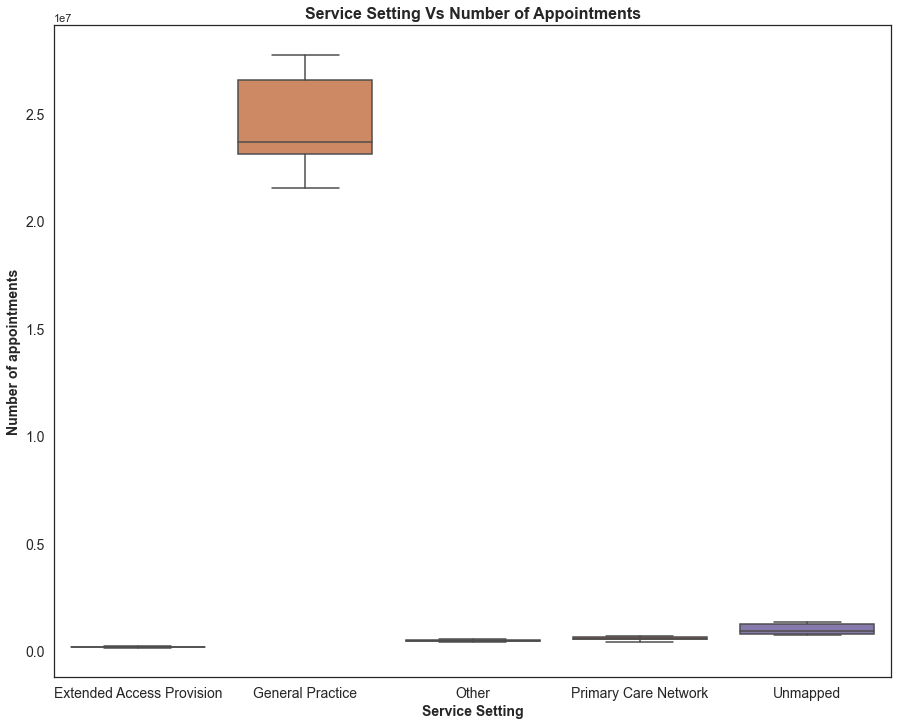

In [94]:
# Create a boxplot to investigate spread of service settings.
sns.set_style('white')
ax = sns.boxplot(x='service_setting', y='count_of_appointments',data=nc_new)

# Add titles and labels for the boxplot
ax.set_title("Service Setting Vs Number of Appointments", fontsize=16,fontweight='bold')
ax.set_xlabel('Service Setting', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)


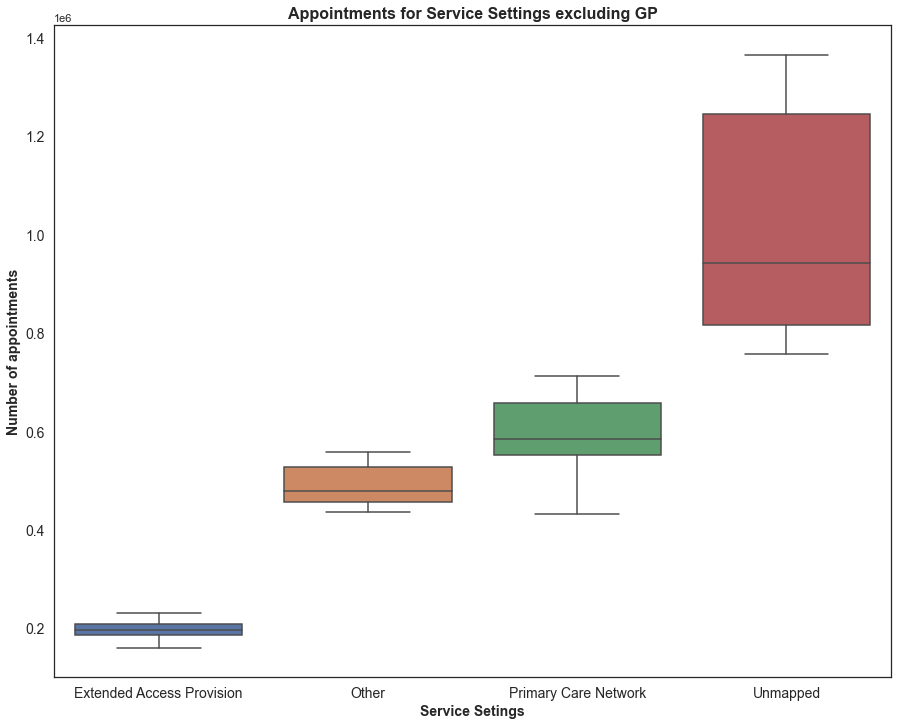

In [95]:
# Create a boxplot to investigate the service settings without GP.

# Service setting  without GP
nc_new[~nc_new['service_setting'].str.contains('General Practice')]


# Create a visualisation to investigate the service settings without GP.
ax = sns.boxplot( y='count_of_appointments',x='service_setting',\
                 data= nc_new[~nc_new['service_setting'].str.contains('General Practice')])

# Add titles and labels for the lineplot
ax.set_title("Appointments for Service Settings excluding GP", fontsize=16,fontweight='bold')
ax.set_xlabel('Service Setings', fontweight='bold',fontsize =14)
ax.set_ylabel('Number of appointments', fontweight='bold',fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=14)


 - General Practice is the most utilised
 - Excluding General Practise, Unmapped service setting has the higher number of appointments.
 
This needs to be improved from a data entry perspective so that accurate data is available for analysis and providing data driven solutions. 

# 

### Summary of Findings and Recommendations: 

Based on the analysis performed on the given data sets, it shows:
 - NHS resources are adequately utilised.
 - November has the highest number of appointments, then October ,March 
 - About 15 % buffer available before NHS reaches its maximum utilisation capacity
   - This includes DNA status appointments
   - There is enough buffer available for capacity utilisation.
 - August ,April ,December  - months with fewer appointments  
    - About 35% buffer available to reach maximum capacity
 - NHS need not consider to increase staff level , although more staffing data is required for in-depth study of adequate staff capacity in the network
 - Significant high number of DNA appointments – to be further investigated to understand the cancelled / missed appointments
 - General Practice Service setting is the most utilised category.
 - Unmapped Service setting – high number of appointments - potential area for improvement in future analysis. 
